In [1]:
import pickle
import numpy as np

f=open("/media/maria/DATA/BrainObservatoryProcessedData/openai_clip-vit-base-patch32_embeddings.pkl",'rb')
currents=pickle.load(f)['natural_movie_one']
mn=np.min(currents)
print(mn)
currents=currents+(-mn)
print(np.max(currents))

-12.493422508239746
17.570687294006348


In [78]:
print(currents)

[[11.89876431 14.22626209 13.09067935 ... 13.72329247 13.6208427
  13.26274431]
 [12.07865611 14.18018126 13.09256166 ... 13.75305557 13.70492816
  13.20872551]
 [11.94676441 14.2371738  13.09044242 ... 13.65784454 13.66206193
  13.183213  ]
 ...
 [12.05541655 14.7960124  13.42146051 ... 13.53298867 13.60923815
  13.39435208]
 [12.50265928 14.84896731 13.14964074 ... 13.6654166  13.33175218
  13.67378771]
 [12.34858012 14.71951389 13.54757631 ... 13.75673711 13.42759573
  13.3992976 ]]


In [2]:
currents.shape

(900, 768)

In [93]:
from sklearn.decomposition import PCA

pca=PCA(n_components=700)
pcs=pca.fit_transform(currents)

pcs.shape

import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot features for natural movie sequence
ax.scatter(
    pcs[:, 0],
    pcs[:, 1],
    pcs[:, 2],
    c='blue',
)

ax.set_title('3D PCA Plot of DINO Features')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [79]:
from brian2 import *

start_scope()
#stimulus = TimedArray(np.tile([100., 0.], 5)*Hz, dt=100.*ms)
stimulus0=TimedArray(currents[:1000,0]*Hz, dt=100.*ms)
stimulus1=TimedArray(currents[:1000,1]*Hz, dt=100.*ms)
P0 = PoissonGroup(700, rates='stimulus0(t)' , dt=10*ms)
P1 = PoissonGroup(700, rates='stimulus1(t)' , dt=10*ms)

M0 = SpikeMonitor(P0)
#Pop=PopulationRateMonitor(P)
M1 = SpikeMonitor(P1)

run(10000*ms) 

In [80]:
from convenience_functions import bin_spikes
binned_arr0=bin_spikes(M0, 700, 10, 0.01)
binned_arr1=bin_spikes(M1,700,10,0.01)

9.99
999
[ 0.          0.01002004  0.02004008  0.03006012  0.04008016  0.0501002
  0.06012024  0.07014028  0.08016032  0.09018036  0.1002004   0.11022044
  0.12024048  0.13026052  0.14028056  0.1503006   0.16032064  0.17034068
  0.18036072  0.19038076  0.2004008   0.21042084  0.22044088  0.23046092
  0.24048096  0.250501    0.26052104  0.27054108  0.28056112  0.29058116
  0.3006012   0.31062124  0.32064128  0.33066132  0.34068136  0.3507014
  0.36072144  0.37074148  0.38076152  0.39078156  0.4008016   0.41082164
  0.42084168  0.43086172  0.44088176  0.4509018   0.46092184  0.47094188
  0.48096192  0.49098196  0.501002    0.51102204  0.52104208  0.53106212
  0.54108216  0.5511022   0.56112224  0.57114228  0.58116232  0.59118236
  0.6012024   0.61122244  0.62124248  0.63126253  0.64128257  0.65130261
  0.66132265  0.67134269  0.68136273  0.69138277  0.70140281  0.71142285
  0.72144289  0.73146293  0.74148297  0.75150301  0.76152305  0.77154309
  0.78156313  0.79158317  0.80160321  0.8116

In [83]:
print(binned_arr0.shape)
new_arr=np.vstack((binned_arr0,binned_arr1))
print(new_arr.shape)

(700, 998)
(1400, 998)


In [84]:
import matplotlib.pyplot as plt
%matplotlib qt
pca=PCA(n_components=90)
pcs=pca.fit_transform(new_arr.T)
# Create a 3D PCA plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot features for natural movie sequence
ax.scatter(
    pcs[:, 0],
    pcs[:, 1],
    pcs[:, 2],
    c='blue',
)

ax.set_title('3D PCA Plot of DINO Features')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [38]:
new_arr.shape

(14000, 98)

In [32]:
plt.plot(pcs[:,0])

In [85]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [86]:
print(pca.explained_variance_ratio_)

[0.00349564 0.003407   0.00336073 0.00333721 0.00329577 0.00328152
 0.00325045 0.00321458 0.00320776 0.00319998 0.00318408 0.00317729
 0.0031506  0.00313563 0.00312207 0.00309854 0.00307884 0.00307671
 0.00305089 0.00304628 0.00303412 0.00301482 0.00300619 0.00299065
 0.00298046 0.00296336 0.00294095 0.00293065 0.00291829 0.0029079
 0.00290236 0.00288827 0.0028804  0.00286703 0.00286108 0.0028469
 0.00284442 0.00283089 0.00281575 0.00280696 0.00278728 0.00278368
 0.00278056 0.00275184 0.00274501 0.00273829 0.00272886 0.00271568
 0.00271391 0.00270319 0.00269826 0.00267407 0.00265706 0.00265123
 0.00264623 0.00263362 0.00262798 0.00261766 0.0026094  0.00259898
 0.00258702 0.00257471 0.00257036 0.00255898 0.00254033 0.00253189
 0.00251509 0.00251026 0.00250491 0.00250035 0.00248732 0.00247708
 0.00246997 0.00244524 0.00244033 0.00242806 0.00241717 0.00240352
 0.0023906  0.00238336 0.0023795  0.00236245 0.00235824 0.00234968
 0.00234002 0.00232869 0.00231993 0.00229647 0.00228572 0.002277

In [87]:
print(pca.explained_variance_)

[0.56094968 0.54672512 0.53930078 0.53552507 0.52887626 0.52658985
 0.52160381 0.51584684 0.51475251 0.51350487 0.51095293 0.50986271
 0.50557951 0.50317793 0.50100247 0.49722695 0.49406418 0.49372293
 0.4895802  0.4888393  0.48688819 0.48379124 0.48240609 0.47991361
 0.47827747 0.47553322 0.4719378  0.47028458 0.46830154 0.46663392
 0.46574455 0.46348353 0.46222133 0.4600747  0.45912017 0.45684444
 0.45644747 0.45427546 0.45184653 0.45043622 0.44727745 0.44670014
 0.44619953 0.44159152 0.44049539 0.43941646 0.43790292 0.43578818
 0.43550391 0.4337834  0.43299214 0.42911045 0.42638079 0.42544547
 0.42464385 0.42262041 0.42171534 0.4200585  0.41873403 0.417061
 0.41514131 0.41316727 0.4124688  0.41064222 0.40764926 0.40629581
 0.4035996  0.40282435 0.40196492 0.40123339 0.39914297 0.39749925
 0.39635906 0.39239103 0.3916032  0.38963306 0.38788645 0.3856961
 0.38362232 0.38245988 0.38184147 0.37910556 0.37842962 0.37705502
 0.37550526 0.37368774 0.37228196 0.36851709 0.36679275 0.3654505

In [11]:
print(binned_arr0)

[[0 0 0 ... 1 0 0]
 [1 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


pos: -0.9975 neg:  6.2721 total:  5.2746 temperature:  1.0000: 100%|██████████| 5000/5000 [05:17<00:00, 15.76it/s]


<Axes: xlabel='Steps', ylabel='InfoNCE Loss'>

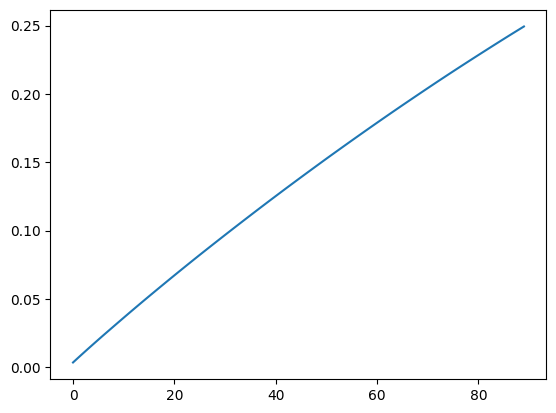

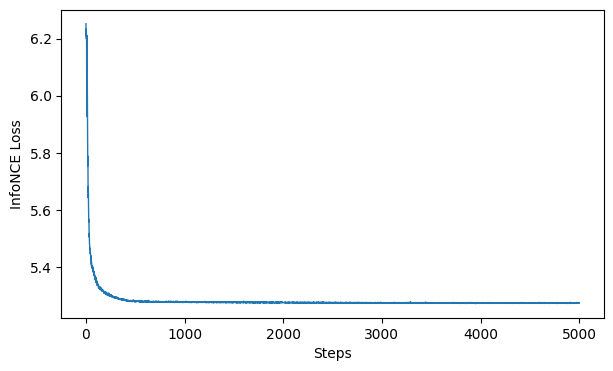

In [88]:
import os

import cebra
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from cebra import CEBRA

%matplotlib inline

# alter the number of max_iterations to get a faster runtime
max_iterations = 5000 # default is 5000
# set conditional to 'time'
cebra_time_model = CEBRA(model_architecture="offset10-model",
                        batch_size=512,
                        learning_rate=1e-2,
                        temperature=1,
                        output_dimension=16,
                        num_hidden_units=128,
                        max_iterations=max_iterations,
                        distance="cosine",
                        conditional="time",
                        device="cuda_if_available",
                        verbose=True,
                        time_offsets=10)
# insert the data you want to train in .fit()
cebra_time_model.fit(new_arr.T)
cebra.plot_loss(cebra_time_model, color = "tab:blue")

In [89]:
cebra_time = cebra_time_model.transform(new_arr.T)
%matplotlib qt
fig = plt.figure(figsize=(20, 7))

plt.title(f"CEBRA-Time")
plt.gca().axis("off")
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax = cebra.plot_embedding(ax=ax, embedding=cebra_time)



In [60]:
cebra_time.shape

(998, 16)

In [90]:
import matplotlib.pyplot as plt
%matplotlib qt
#pca=PCA(n_components=90)
#pcs=pca.fit_transform(cebra_time.T)
# Create a 3D PCA plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot features for natural movie sequence
ax.scatter(
    cebra_time[:, 0],
    cebra_time[:, 1],
    cebra_time[:, 2],
    c='blue',
)

ax.set_title('3D PCA Plot of DINO Features')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [92]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot features for natural movie sequence
ax.scatter(
    currents[:, 0],
    currents[:, 1],
    currents[:, 2],
    c='blue',
)

ax.set_title('3D PCA Plot of DINO Features')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [75]:
plt.plot(cebra_time[:,0])
plt.show()
#plt.plot(cebra_time[:,1])
#plt.plot(cebra_time[:,2])
#plt.plot(cebra_time[:,3])
#plt.plot(cebra_time[:,4])
#plt.plot(cebra_time[:,5])

In [72]:
cebra_time[:,0].shape

(998,)